In [0]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(3) 

In [65]:


colors_map = np.array(['b', 'r'])
def assign_members(x1, x2, centers):
    compare_to_first_center = np.sqrt(np.square(np.array(x1) - centers[0][0]) + np.square(np.array(x2) - centers[0][1]))
    # print(" np.square(np.array(x1) - centers[0][0])  = {} \n compare to first center {}".format(np.square(np.array(x1) - centers[0][0]), compare_to_first_center))
    compare_to_second_center = np.sqrt(np.square(np.array(x1) - centers[1][0]) + np.square(np.array(x2) - centers[1][1]))
    # print(" np.square(np.array(x2) - centers[1][1])  = {} \n compare to first center {}".format(np.square(np.array(x1) - centers[1][0]), compare_to_second_center))
    class_of_points = compare_to_first_center > compare_to_second_center
    # print("class_of_points".format(class_of_points))
    colors = colors_map[class_of_points + 1 - 1]
    # print("colors {}".format(colors))
    return colors, class_of_points

print('assign_members function defined!')

assign_members function defined!


In [0]:
x1 = np.random.randint(-10,10,15)
x2 = np.random.randint(-10,10,15)
centers = [[0,0],[4,6]]
# c = assign_members(x1, x2, centers)
# for item, i in enumerate(x2):
#   print(i, item)

In [67]:
def update_centers(x1, x2, class_of_points):
    # print(f"np.array(x1) = {np.array(x1)}")
    # print(f"[~class_of_points] = {~class_of_points}")
    # print(f"np.array(x1)[~class_of_points] = {np.array(x1)[~class_of_points]}")
    center1 = [np.mean(np.array(x1)[~class_of_points]), np.mean(np.array(x2)[~class_of_points])]
    # print(f"center1 = {center1}")
    # print("\n ############ \n")
    center2 = [np.mean(np.array(x1)[class_of_points]), np.mean(np.array(x2)[class_of_points])]
    # print(f"np.array(x1)[~class_of_points] = {np.array(x1)[class_of_points]}")
    # print(f"center1 = {center2}")
    return [center1, center2]

update_centers(x1, x2, c[1])

[[-1.2727272727272727, -0.36363636363636365], [-1.75, 2.0]]

In [68]:
def plot_points(centroids=None, colors='g', figure_title=None):
    # plot the figure
    fig = plt.figure(figsize=(15, 10))  # create a figure object
    ax = fig.add_subplot(1, 1, 1)
    
    centroid_colors = ['bx', 'rx']
    if centroids:
        for (i, centroid) in enumerate(centroids):
            ax.plot(centroid[0], centroid[1], centroid_colors[i], markeredgewidth=5, markersize=20)
    plt.scatter(x1, x2, s=500, c=colors)
    
    # define the ticks
    xticks = np.linspace(-6, 8, 15, endpoint=True)
    yticks = np.linspace(-6, 6, 13, endpoint=True)

    # fix the horizontal axis
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)

    # add tick labels
    xlabels = xticks
    ax.set_xticklabels(xlabels)
    ylabels = yticks
    ax.set_yticklabels(ylabels)

    # style the ticks
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.tick_params('both', length=2, width=1, which='major', labelsize=15)
    
    # add labels to axes
    ax.set_xlabel('x1', fontsize=20)
    ax.set_ylabel('x2', fontsize=20)
    
    # add title to figure
    ax.set_title(figure_title, fontsize=24)

    plt.show()

print('plot_points function defined!')

plot_points function defined!


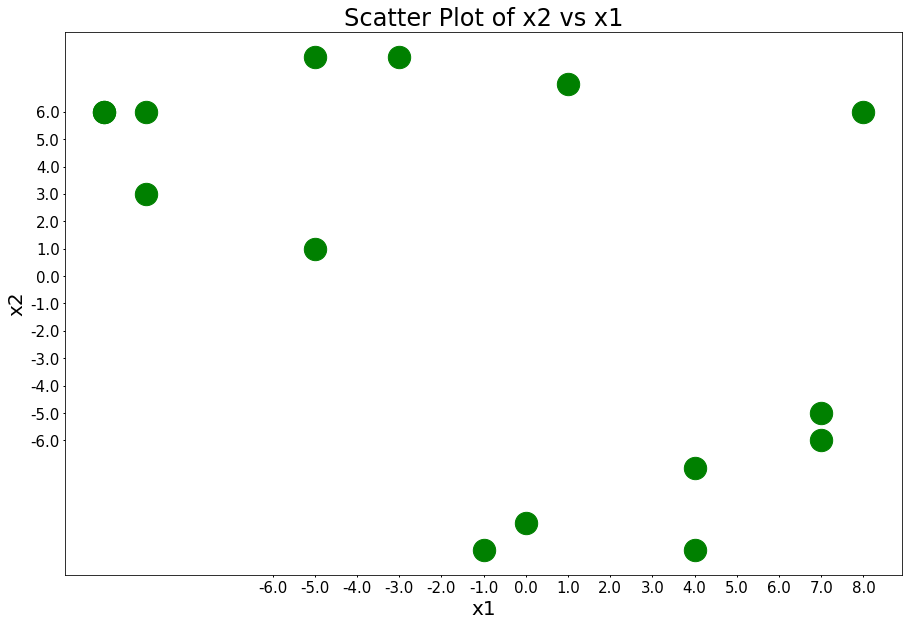

In [69]:
plot_points(figure_title='Scatter Plot of x2 vs x1')

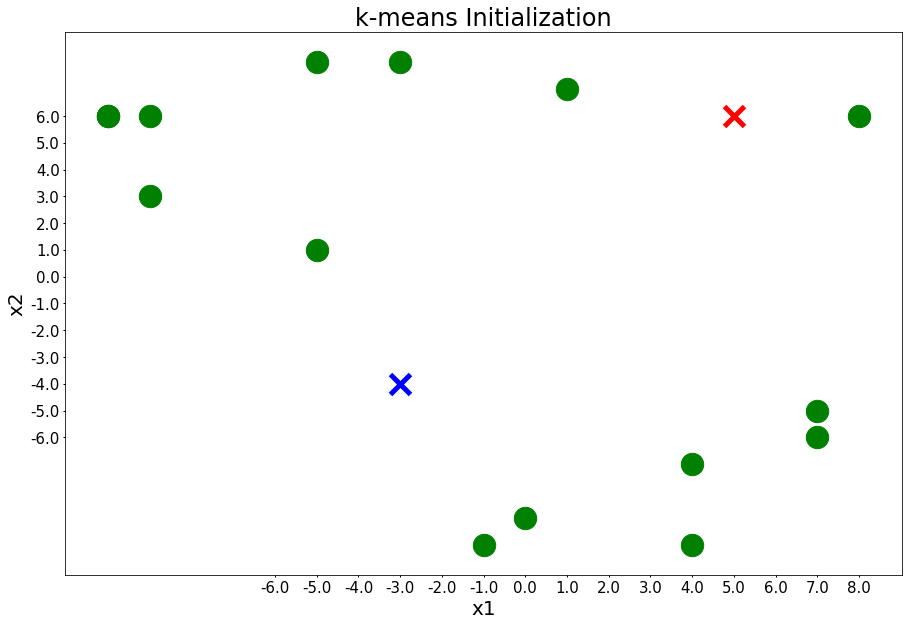

In [70]:
centers = [[-3, -4], [5, 6]]
plot_points(centers, figure_title='k-means Initialization')


Iteration 1 - Press Enter to update the members of each cluster
colors: ['b' 'b' 'b' 'b' 'b' 'r' 'r' 'r' 'b' 'b' 'b' 'b' 'b' 'b' 'r'],class_of_points: [False False False False False  True  True  True False False False False
 False False  True]


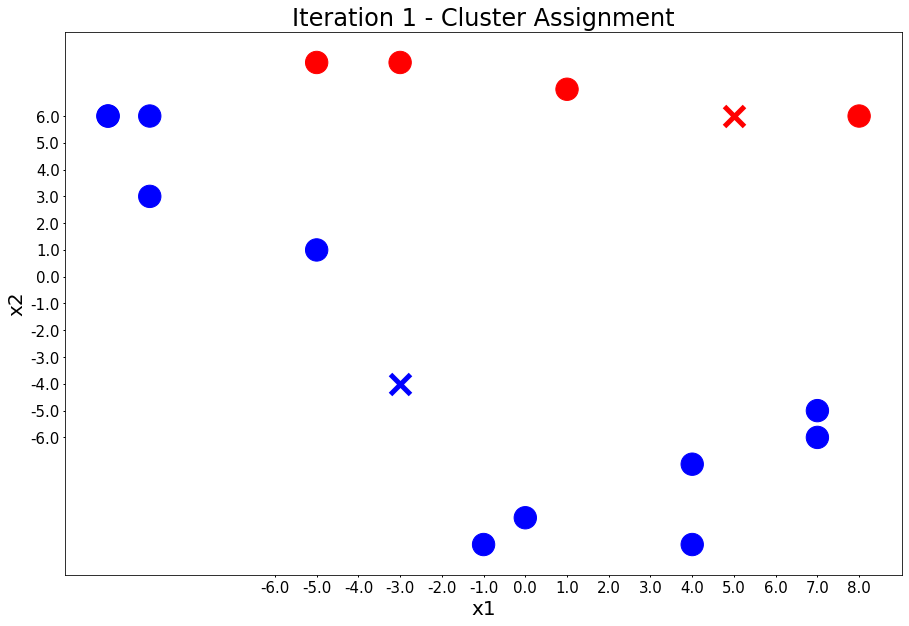

Iteration 1 - Press Enter to update the centers


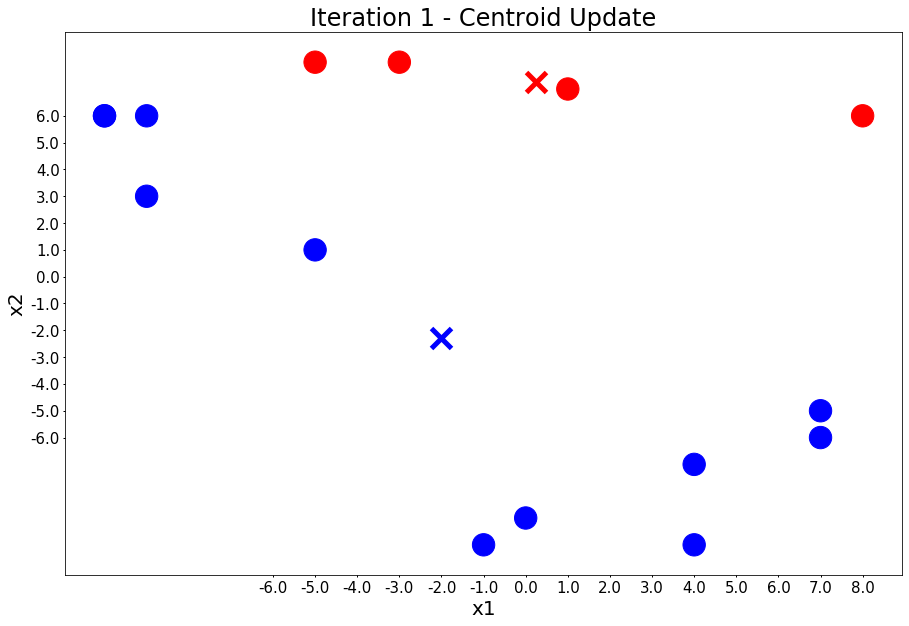

Iteration 2 - Press Enter to update the members of each cluster
colors: ['b' 'b' 'r' 'r' 'b' 'r' 'r' 'r' 'b' 'b' 'b' 'b' 'r' 'b' 'r'],class_of_points: [False False  True  True False  True  True  True False False False False
  True False  True]


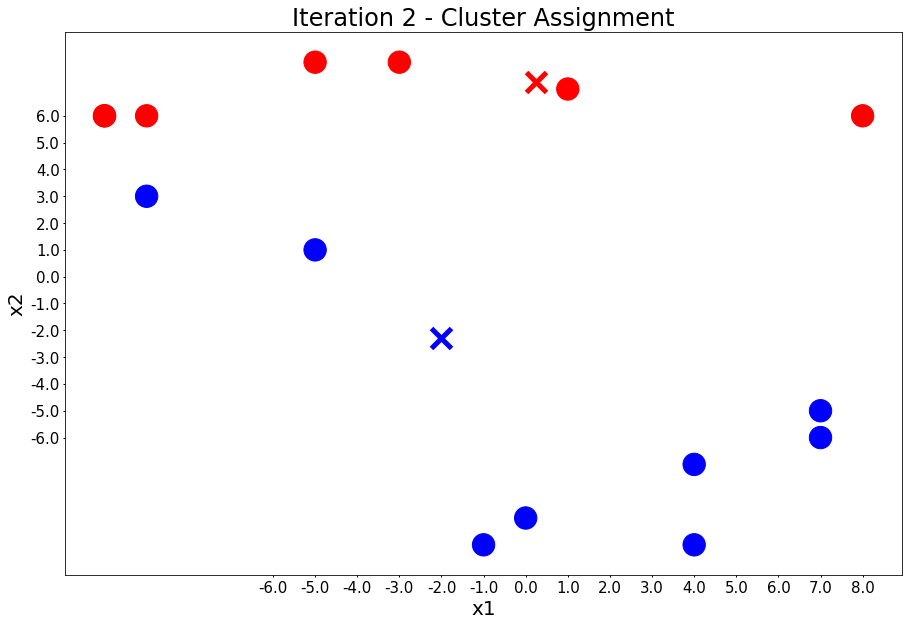

Iteration 2 - Press Enter to update the centers


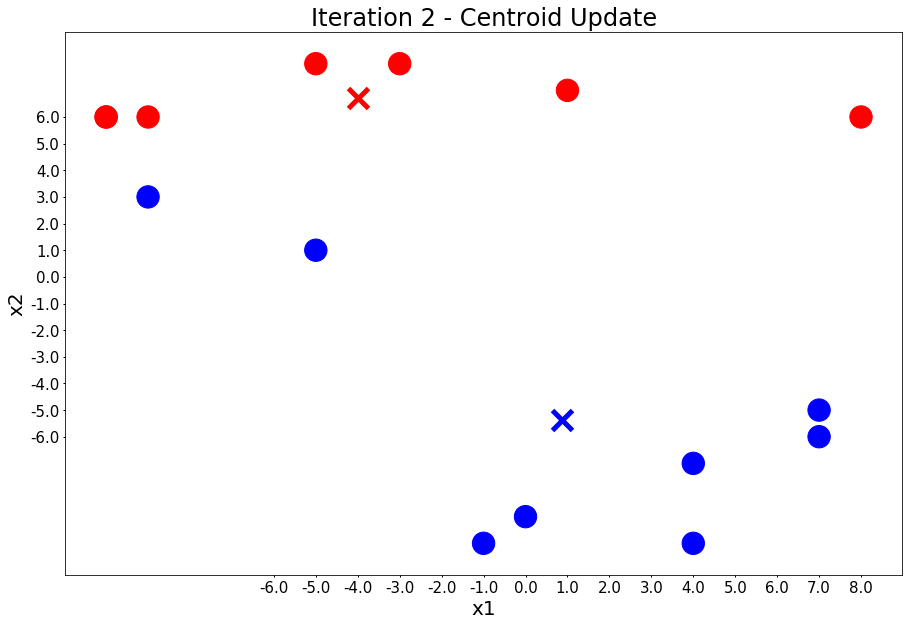

Iteration 3 - Press Enter to update the members of each cluster
colors: ['b' 'b' 'r' 'r' 'b' 'r' 'r' 'r' 'r' 'b' 'r' 'b' 'r' 'b' 'r'],class_of_points: [False False  True  True False  True  True  True  True False  True False
  True False  True]


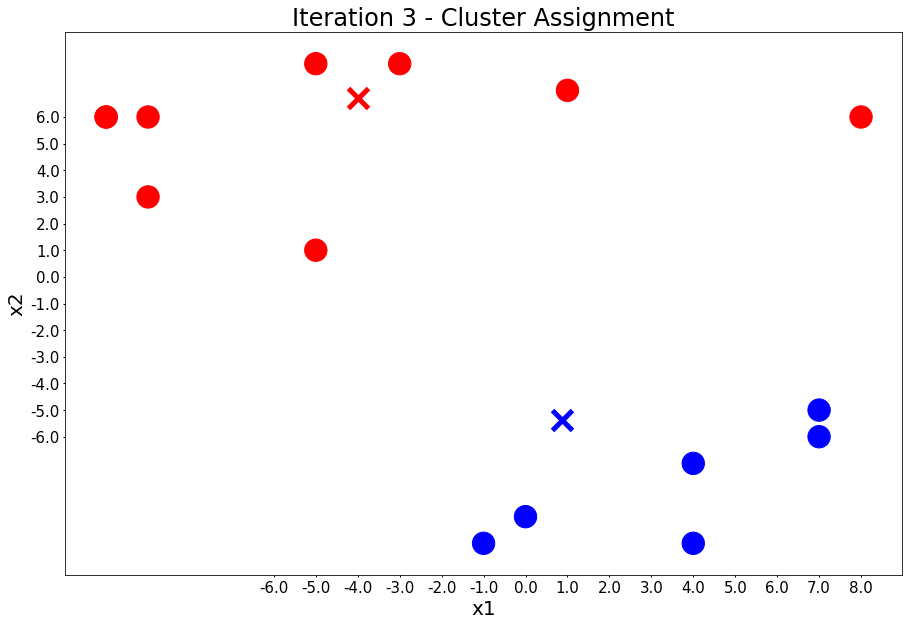

Iteration 3 - Press Enter to update the centers


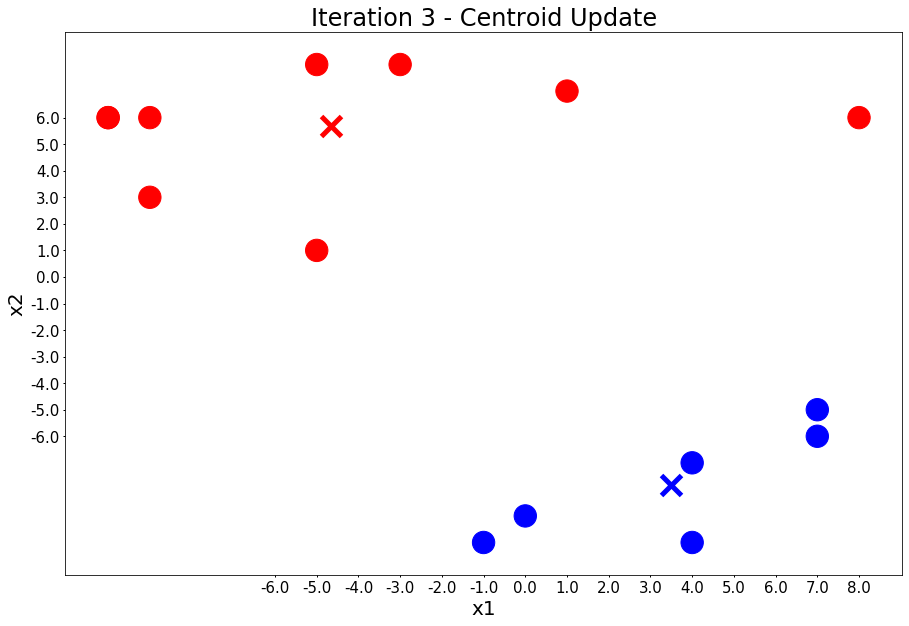

Iteration 4 - Press Enter to update the members of each cluster
colors: ['b' 'b' 'r' 'r' 'b' 'r' 'r' 'r' 'r' 'b' 'r' 'b' 'r' 'b' 'r'],class_of_points: [False False  True  True False  True  True  True  True False  True False
  True False  True]


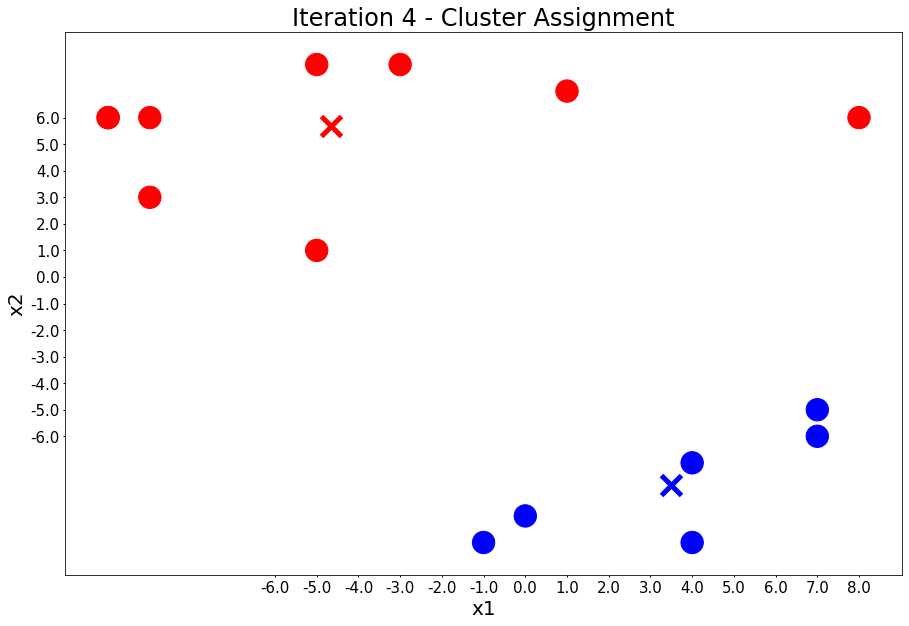

Iteration 4 - Press Enter to update the centers


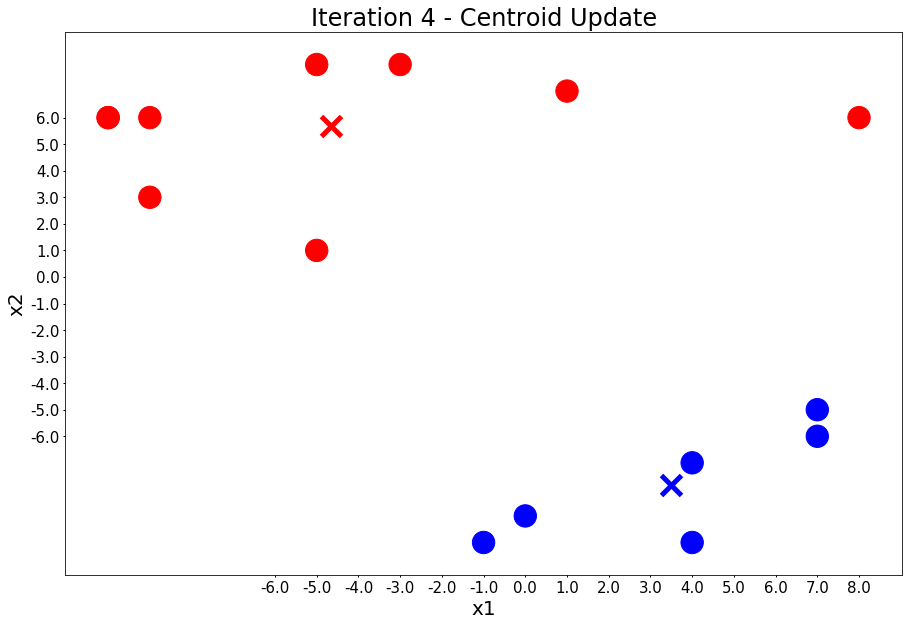

In [71]:
number_of_iterations = 4
for i in range(number_of_iterations):
    input(f'Iteration {i + 1} - Press Enter to update the members of each cluster')
    colors, class_of_points = assign_members(x1, x2, centers)
    print(f"colors: {colors},class_of_points: {class_of_points}")
    title = f'Iteration {i + 1} - Cluster Assignment'
    plot_points(centers, colors, figure_title=title)
    input(f'Iteration {i + 1} - Press Enter to update the centers')
    centers = update_centers(x1, x2, class_of_points)
    title = f'Iteration {i + 1} - Centroid Update'
    plot_points(centers, colors, figure_title=title)

## Generating the Data

In [0]:
from sklearn.datasets.samples_generator import make_blobs

X, y = make_blobs(n_samples=6000, centers=[[2,2 ], [2, -2], [-3, -3], [-2, 1]], cluster_std=0.9)


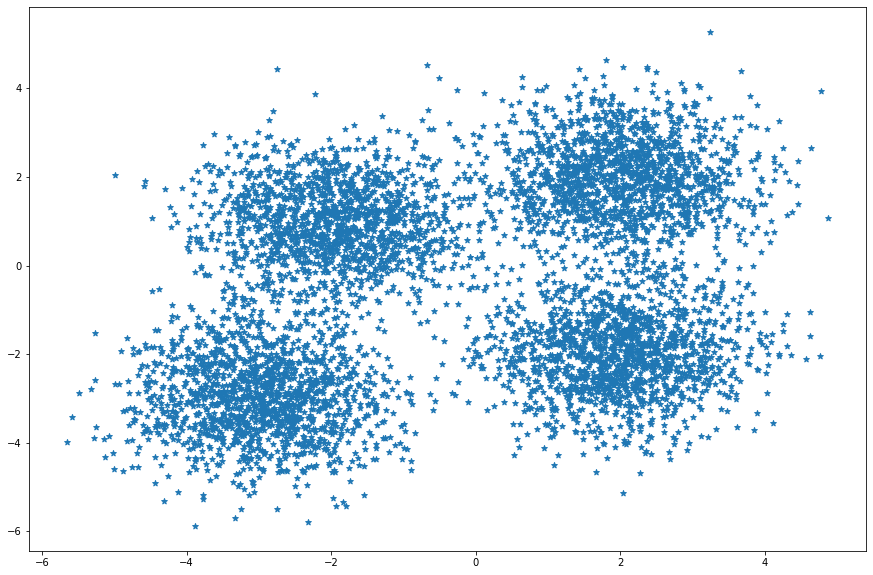

In [88]:
plt.figure(figsize=(15, 10))
plt.scatter(X[:, 0], X[:, 1], marker='*')

In [90]:
from sklearn.cluster import KMeans

k_means = KMeans(init="k-means++", n_clusters=4, n_init=12)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [96]:
k_means_labels = k_means.labels_
k_means_cluster_centers = k_means.cluster_centers_
len(set(k_means_labels))

4

my_members:  6000
cluster_center [-1.98320803  0.96478471]
my_members:  6000
cluster_center [ 1.9780623  -2.00097931]
my_members:  6000
cluster_center [-2.99079002 -2.9867301 ]
my_members:  6000
cluster_center [2.00901606 2.00524947]


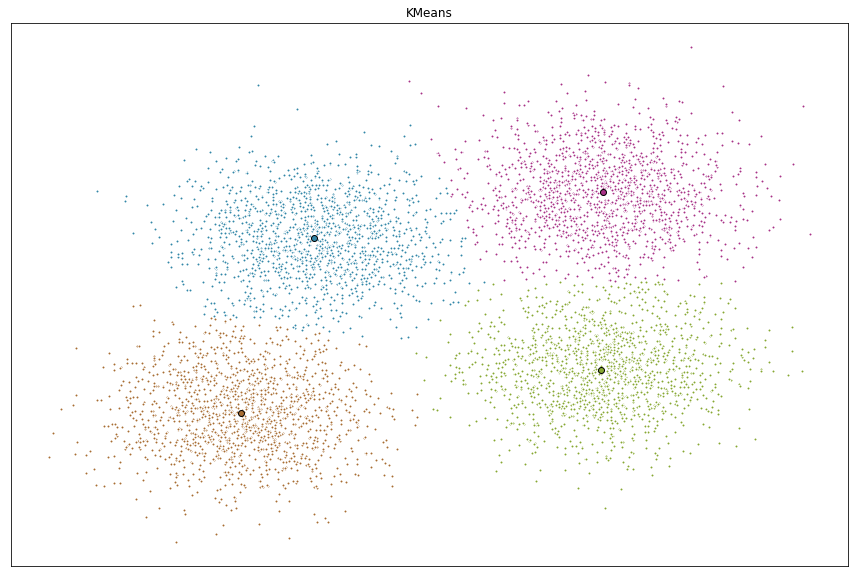

In [97]:
fig = plt.figure(figsize=(15, 10))
colors = ['#3287a8','#87a832','#a86d32', '#a83287']

ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    my_members = (k_means_labels == k)
    print("my_members: ", len(my_members))
    cluster_center = k_means_cluster_centers[k]
    print("cluster_center",cluster_center)
    
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

ax.set_title('KMeans')

ax.set_xticks(())

ax.set_yticks(())

plt.show()

In [98]:
!wget -q -O 'customer_segmentation.csv' https://cocl.us/customer_dataset
print('Data downloaded!')

Data downloaded!


In [99]:
!ls

customer_segmentation.csv  sample_data
